In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold as kf
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns

In [3]:
import numpy as np

class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history= [ ]
        self.w_list = [ ]

    def fit(self, X, y):
        
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        eps=10**-10
        
        # gradient descent
        for _ in range(self.n_iters):
            
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # update parameters
#             w_prev = self.weights
#             w0_prev = self.bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            #appending cost and w values
    
            cost=-np.sum(y*np.log(y_predicted) + (1-y) * np.log(1 - y_predicted))
            self.cost_history.append(cost)
            w=list(self.weights)
            w.append(self.bias)
            self.w_list.append(w)
            
            #stoping criteria
#             if np.sum(np.square(w_prev-self.weights)) < eps:
#                 break
                

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return y_predicted

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def score(self,x_test,y_test):
        y_p = self.predict(x_test)
        correct = 0
        for i in range(len(y_p)):
            if y_p[i]==y_test[i]:
                correct+=1
        return correct/len(y_p)

In [4]:
cancer=pd.read_csv("wdbc.data",header=None)

In [5]:
cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cancer = cancer.drop([0],axis='columns')
cancer

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
x=cancer.iloc[:,1:31]
y=np.array([1 if i=="M" else 0 for i in cancer[1]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [9]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
k=kf(n_splits=20)
lr_range = [10**i for i in range(-9,-3)]
for j in lr_range :
    a=[ ]
    for train_index,test_index in k.split(X_train,y_train):
        reg=LogisticRegression(learning_rate=j,n_iters=200)
        reg.fit(X_train[train_index],y_train[train_index])
        a.append(reg.score(X_train[test_index],y_train[test_index]))
        sc=sum(a)/len(a)
    print("Learning rate:",j," and Score is :",sc)

Learning rate: 1e-09  and Score is : 0.36861471861471873
Learning rate: 1e-08  and Score is : 0.36861471861471873
Learning rate: 1e-07  and Score is : 0.36861471861471873
Learning rate: 1e-06  and Score is : 0.896861471861472
Learning rate: 1e-05  and Score is : 0.9114718614718618


C:\Users\adity_000\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
C:\Users\adity_000\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


Learning rate: 0.0001  and Score is : 0.8944805194805197


In [12]:
reg=LogisticRegression(learning_rate=10**-5)
reg.fit(X_train,y_train)

C:\Users\adity_000\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
C:\Users\adity_000\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


In [13]:
reg.score(X_test,y_test)

0.9230769230769231

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
def calc(cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    pr = tp/(tp+fp)
    fm = 2*(pr*sn)/(pr+sn)
    print(f"Sensitivity is {sn}")
    print(f"Specificity is {sp}")
    print(f"Precission is {pr}")
    print(f"F_measur is {fm}")

<AxesSubplot:>

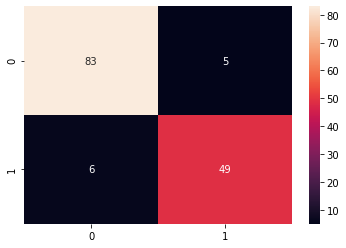

In [16]:
y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True)

In [17]:
calc(cm)

Sensitivity is 0.8909090909090909
Specificity is 0.9431818181818182
Precission is 0.9074074074074074
F_measur is 0.8990825688073394


In [18]:
reg.weights

array([-5.01873615e-03, -8.49964668e-03, -2.98269082e-02, -1.71025356e-02,
       -5.26257044e-05,  6.04832373e-07,  6.32188340e-05,  2.94431931e-05,
       -9.82052845e-05, -4.08730374e-05, -3.43799286e-05, -6.54121071e-04,
       -8.01201272e-05,  1.06845253e-02, -3.79505834e-06, -1.59012541e-06,
       -2.66963731e-07, -8.17867492e-07, -1.04232420e-05, -1.55830758e-06,
       -5.10847489e-03, -1.06718251e-02, -2.97705388e-02,  2.05621769e-02,
       -6.71260517e-05,  4.37149957e-05,  1.25279624e-04,  3.13279946e-05,
       -1.32954380e-04, -4.07570442e-05])

In [19]:
reg.bias

-0.0006750341696355451

### Appling normalisation

In [20]:
def normalise(data):
    d_min = data.min()
    d_max = data.max()
    data = (data - d_min) / (d_max - d_min)
    return  data,d_min,d_max

x_norm , x_min , x_max = normalise(X_train)
y_norm , y_min , y_max = normalise(y_train)

x_norm

array([[4.58916084e-03, 5.60023310e-03, 3.12062937e-02, ...,
        6.22086247e-05, 1.23688811e-04, 3.05944056e-05],
       [4.13461538e-03, 6.93764569e-03, 2.70600233e-02, ...,
        5.16317016e-05, 1.37645688e-04, 2.98951049e-05],
       [2.54254079e-03, 4.61247086e-03, 1.62703963e-02, ...,
        3.05944056e-05, 8.52564103e-05, 2.96328671e-05],
       ...,
       [5.55652681e-03, 7.22902098e-03, 3.73834499e-02, ...,
        7.26398601e-05, 1.36072261e-04, 3.02447552e-05],
       [4.14335664e-03, 8.11480186e-03, 2.69667832e-02, ...,
        2.39481352e-05, 5.50699301e-05, 2.27156177e-05],
       [5.70804196e-03, 5.28846154e-03, 3.80827506e-02, ...,
        6.54720280e-05, 1.06148019e-04, 2.68735431e-05]])

In [21]:
k=kf(n_splits=20)
lr_range = [10**i for i in range(-4,3)]
for j in lr_range :
    a=[ ]
    for train_index,test_index in k.split(x_norm,y_norm):
        reg=LogisticRegression(learning_rate=j,n_iters=200)
        reg.fit(x_norm[train_index],y_norm[train_index])
        a.append(reg.score(x_norm[test_index],y_norm[test_index]))
        sc=sum(a)/len(a)
    print("Learning rate:",j," and Score is :",sc)

Learning rate: 0.0001  and Score is : 0.631385281385281
Learning rate: 0.001  and Score is : 0.631385281385281
Learning rate: 0.01  and Score is : 0.631385281385281
Learning rate: 0.1  and Score is : 0.6548701298701297
Learning rate: 1  and Score is : 0.8569264069264071
Learning rate: 10  and Score is : 0.896753246753247


C:\Users\adity_000\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
C:\Users\adity_000\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


Learning rate: 100  and Score is : 0.8471861471861473


### From Above data we supposed to take learning parameter as 10

In [22]:
model = LogisticRegression(learning_rate=10)

In [23]:
model.fit(x_norm,y_norm)

In [24]:
### Normalising the test data using previous max and min value

x_norm_test = ( X_test - x_min ) / (x_max - x_min )
y_norm_test = (y_test - y_min) / (y_max - y_min)

x_norm_test

array([[7.93123543e-03, 6.37237762e-03, 5.30594406e-02, ...,
        7.83216783e-05, 8.32167832e-05, 2.35489510e-05],
       [5.26806527e-03, 6.36363636e-03, 3.42074592e-02, ...,
        2.67511655e-05, 6.90268065e-05, 1.91083916e-05],
       [2.86917249e-03, 4.56876457e-03, 1.83566434e-02, ...,
        1.90209790e-05, 7.29020979e-05, 2.68327506e-05],
       ...,
       [3.86655012e-03, 4.30069930e-03, 2.46911422e-02, ...,
        2.91666667e-05, 5.90617716e-05, 1.80827506e-05],
       [3.21678322e-03, 4.90384615e-03, 2.06643357e-02, ...,
        2.16520979e-05, 8.73543124e-05, 2.29632867e-05],
       [4.57459207e-03, 5.91783217e-03, 2.94871795e-02, ...,
        4.49009324e-05, 1.00145688e-04, 2.51486014e-05]])

In [25]:
model.score(x_norm_test,y_norm_test)

0.9370629370629371

In [26]:
y_pred = model.predict(x_norm_test)

In [27]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [28]:
y_norm_test

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1.])